# Analysing data from weights and biases

## Import relevant tools

In [2]:
# Convenient jupyter setup
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy=True

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# set up plotting settings.
from src.plot_utils import plot_defaults
plot_defaults()

In [3]:
import numpy as np
from src.wandb_utils import metric_conv_data
from src.models.poly import fit
import matplotlib.pyplot as plt
from uncertainties import unumpy as unp

## Collecting data from wandb

Collect all the required data from a particular run with other paramters controlled.

In [4]:
mem_dict = {}
for mem in ["EEEE", "EECE", "EEEC", "EECC"]:
    metric_d, _ = metric_conv_data(
        metric_name="trend_nino3.4",
        prefix="k_days_10_eps_days",
        ex_list=["ingrid_True"],
        control_variable_list=[
            (("atm", "k_days"), 10),
            # (("coup", "c_d"), 2.25e-3),
            (("atm", "e_frac"), 0.5),
            (("atm", "eps_days"), 0.75),
            (("atm", "mem"), mem),
            (("atm", "vary_cloud_const"), True),
        ],
        index_by=("coup", "c_d"),
    )
    mem_dict[mem] = [[], []]
    for val in metric_d:
        mem_dict[mem][0].append(float(val))
        mem_dict[mem][1].append(float(metric_d[val][5, 1]))

k_days_10_eps_days_0.75_e_frac_0.5_c_d_0.00025_vary_cloud_const_True_EEEE
k_days_10_eps_days_0.75_e_frac_0.5_c_d_0_vary_cloud_const_True_EEEE
k_days_10_eps_days_0.75_e_frac_0.5_c_d_0.002_vary_cloud_const_True_EEEE
k_days_10_eps_days_0.75_e_frac_0.5_c_d_0.001_vary_cloud_const_True_EEEE
k_days_10_eps_days_0.75_e_frac_0.5_c_d_0.003_vary_cloud_const_True_EEEE
k_days_10_eps_days_0.75_e_frac_0.5_c_d_0.002_vary_cloud_const_True_EEEE
k_days_10_eps_days_0.75_e_frac_0.5_c_d_0.00125_vary_cloud_const_True_EEEE
k_days_10_eps_days_0.75_e_frac_0.5_c_d_0.00175_vary_cloud_const_True_EEEE
k_days_10_eps_days_0.75_e_frac_0.5_c_d_0.0015_vary_cloud_const_True_EEEE
k_days_10_eps_days_0.75_e_frac_0.5_c_d_0.00225_vary_cloud_const_True_EEEE
k_days_10_eps_days_0.75_e_frac_0.5_c_d_0.0025_vary_cloud_const_True_EEEE
k_days_10_eps_days_0.75_e_frac_0.5_c_d_0.00025_vary_cloud_const_True_EECE
k_days_10_eps_days_0.75_e_frac_0.5_c_d_0_vary_cloud_const_True_EECE
k_days_10_eps_days_0.75_e_frac_0.5_c_d_0.00075_vary_cloud_co

## Plot data from wandb

param EEEE [-20.01127415639631+/-0.605798369381671
 0.4810086265055368+/-0.001087909985178536]
param EECE [-19.664065317776124+/-0.6014229809489599
 0.5366611332943885+/-0.0010387315828538726]
param EEEC [-6.258569960543675+/-0.9998655685643177
 0.7959540076231921+/-0.001718648144296277]
param EECC [6.530101974397601+/-0.7340304753418364
 0.9315313394718199+/-0.001297594806424033]


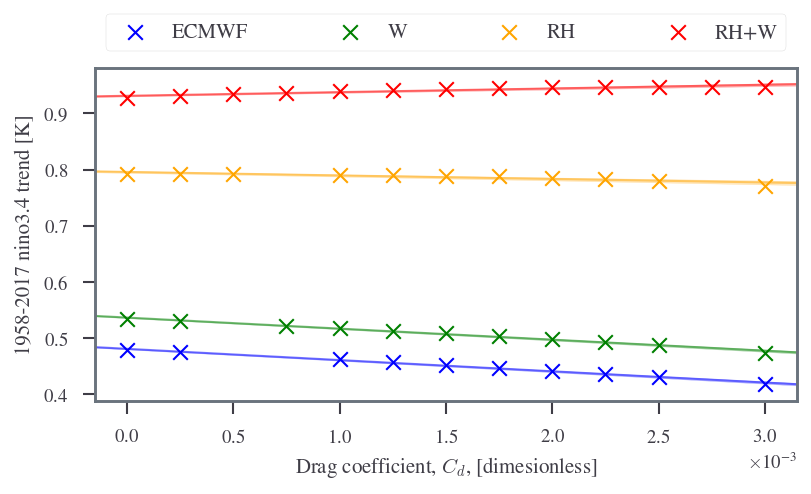

In [5]:
color_d = {
    "EEEE": "blue",
    "EECE": "green",
    "EEEC": "orange",
    "EECC": "red",
}

name_d = {
    "EEEE": "ECMWF",
    "EECE": "W",
    "EEEC": "RH",
    "EECC": "RH+W",
}
min_x = np.inf
max_x = -np.inf

for mem in name_d:
    if min(mem_dict[mem][0]) < min_x:
        min_x = min(mem_dict[mem][0])
    if max(mem_dict[mem][0]) > max_x:
        max_x = max(mem_dict[mem][0])

ext = 0.05
min_x_pred = min_x - (max_x - min_x) * ext
max_x_pred = max_x + (max_x - min_x) * ext
x_pred = np.linspace(min_x_pred, max_x_pred, num=50)

for mem in name_d:
    param, func = fit(mem_dict[mem][0], mem_dict[mem][1], reg_type="lin")
    print("param", mem, param)
    y_pred = func(x_pred)
    y_pred_n = unp.nominal_values(y_pred)
    y_pred_s = unp.std_devs(y_pred)
    plt.fill_between(
        x_pred,
        y_pred_n + y_pred_s,
        y_pred_n - y_pred_s,
        alpha=0.25,
        color=color_d[mem],
    )
    plt.plot(x_pred, y_pred_n, color=color_d[mem], alpha=0.5)
    plt.scatter(
        mem_dict[mem][0],
        mem_dict[mem][1],
        marker="x",
        label=name_d[mem],
        c=color_d[mem],
    )

plt.xlabel("Drag coefficient, $C_d$, [dimesionless]")
plt.ylabel("1958-2017 nino3.4 trend [K]")
plt.legend(
    bbox_to_anchor=(0.0, 1.02, 1, 0.102),
    loc="lower left",
    mode="expand",
    ncol=4,
)
plt.gca().ticklabel_format(axis="x", style="sci", scilimits=(0, 0), useMathText=True)

plt.xlim(min_x_pred, max_x_pred)
plt.tight_layout()

In [6]:
_[0].cfg["oc"].nummode

2

In [7]:
_[0.00225].cfg["oc"].nummode

2

## Arrow plots

In [8]:
mem_dict = {}
for mem in ["EEEE", "EECE", "EEEC", "EECC"]:
    metric_d = {}
    for vary_cloud_const in [True, False]:
        for e_frac in [0.5, 2]:
            metric_d_loc, _ = metric_conv_data(
                metric_name="trend_nino3.4",
                prefix="",
                ex_list=["ingrid_True"],
                control_variable_list=[
                    (("atm", "k_days"), 10),
                    (("coup", "c_d"), 2.25e-3),
                    (("atm", "e_frac"), e_frac),
                    (("atm", "eps_days"), 0.75),
                    (("atm", "mem"), mem),
                    (("atm", "vary_cloud_const"), vary_cloud_const),
                ],
                index_by=("name"),
            )
            metric_d = {**metric_d_loc, **metric_d}

    mem_dict[mem] = [[], []]
    for val in metric_d:
        mem_dict[mem][0].append(val)
        mem_dict[mem][1].append(float(metric_d[val][5, 1]))

test25
test24
k_days_10_eps_days_0.75_e_frac_0.5_c_d_0.00225_vary_cloud_const_True_EEEE
N_ECMWF_coup
ECMWF_coup
E2_ECMWF_coup
E_ECMWF_coup
A_ECMWF_coup
AE_ECMWF_coup
k_days_10_eps_days_0.75_e_frac_0.5_c_d_0.00225_vary_cloud_const_True_EECE
N_C_W2_coup
N_C_W_coup
C_W_coup
E2_C_W_coup
E_C_W_coup
A_C_W2_coup
A_C_W_coup
AE_C_W_coup
k_days_10_eps_days_0.75_e_frac_0.5_c_d_0.00225_vary_cloud_const_True_EEEC
N_C_RH_coup
C_RH_coup
E2_C_RH_coup
E_C_RH_coup
A_C_RH_coup
AE_C_RH_coup
k_days_10_eps_days_0.75_e_frac_0.5_c_d_0.00225_vary_cloud_const_True_EECC
N_C_RH_W2_coup
N_C_RH_W_coup
C_RH_W_coup
E2_C_RH_W_coup
E_C_RH_W_coup
A_C_RH_W2_coup
A_C_RH_W_coup
AE_C_RH_W_coup


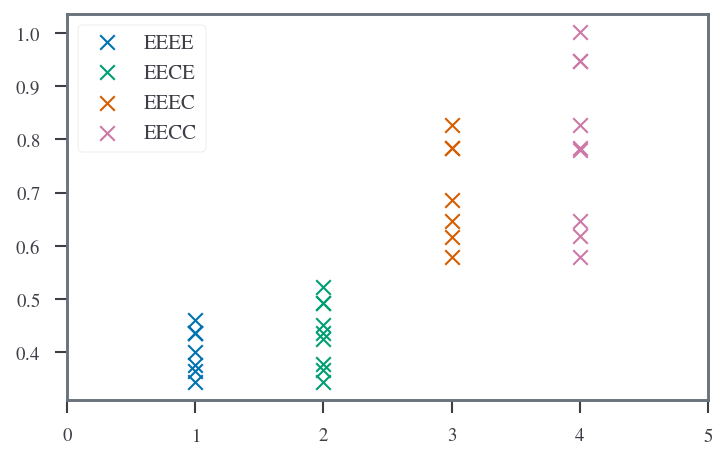

In [9]:
i = 1
for mem in mem_dict:
    #print([i for _ in mem_dict[mem][1]], mem_dict[mem][1])
    plt.scatter([i for _ in mem_dict[mem][1]], mem_dict[mem][1], label=mem)
    i += 1
    
plt.xlim(0, i)
plt.legend()

In [10]:
metric_d

{'AE_C_RH_W_coup': array([[0.        , 0.55993331],
        [1.        , 0.46083996],
        [2.        , 0.74789722],
        [3.        , 0.77034592],
        [4.        , 0.82005772],
        [5.        , 0.82740342]]),
 'A_C_RH_W2_coup': array([[0.        , 0.55993331],
        [1.        , 0.40156689],
        [2.        , 0.71137339],
        [3.        , 0.72161181],
        [4.        , 0.77504443],
        [5.        , 0.78024562]]),
 'A_C_RH_W_coup': array([[0.        , 0.55993331],
        [1.        , 0.35873489],
        [2.        , 0.63544161],
        [3.        , 0.60192197],
        [4.        , 0.65120501],
        [5.        , 0.6474647 ]]),
 'E2_C_RH_W_coup': array([[0.        , 0.55993331],
        [1.        , 0.52378907],
        [2.        , 0.81098679],
        [3.        , 0.92877046],
        [4.        , 0.97999571],
        [5.        , 1.00194651]]),
 'E_C_RH_W_coup': array([[0.        , 0.55993331],
        [1.        , 0.35293816],
        [2.        ,

test25
k_days_10_eps_days_0.75_e_frac_0.5_c_d_0.00225_vary_cloud_const_True_EEEE
N_ECMWF_coup
ECMWF_coup
E2_ECMWF_coup
E_ECMWF_coup
A_ECMWF_coup
AE_ECMWF_coup
k_days_10_eps_days_0.75_e_frac_0.5_c_d_0.00225_vary_cloud_const_True_EEE6
k_days_10_eps_days_0.75_e_frac_2_c_d_0.00225_vary_cloud_const_True_EEE6
k_days_10_eps_days_0.75_e_frac_0.5_c_d_0.00225_vary_cloud_const_False_EEE6
k_days_10_eps_days_0.75_e_frac_2_c_d_0.00225_vary_cloud_const_False_EEE6
k_days_10_eps_days_0.75_e_frac_0.5_c_d_0.00225_vary_cloud_const_True_6E6E
k_days_10_eps_days_0.75_e_frac_2_c_d_0.00225_vary_cloud_const_True_6E6E
k_days_10_eps_days_0.75_e_frac_0.5_c_d_0.00225_vary_cloud_const_False_6E6E
k_days_10_eps_days_0.75_e_frac_2_c_d_0.00225_vary_cloud_const_False_6E6E
k_days_10_eps_days_0.75_e_frac_0.5_c_d_0.00225_vary_cloud_const_True_E66E
k_days_10_eps_days_0.75_e_frac_2_c_d_0.00225_vary_cloud_const_True_E66E
k_days_10_eps_days_0.75_e_frac_0.5_c_d_0.00225_vary_cloud_const_False_E66E
k_days_10_eps_days_0.75_e_frac_2

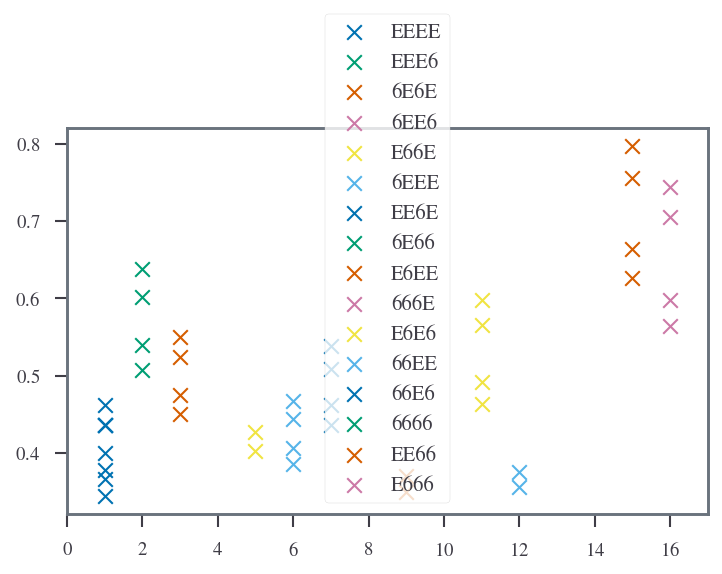

In [35]:
from src.search import variable_combinations
variable_combinations(vary=[True, True, True, True], exps=["6"])
mem_dict = {}
for mem in variable_combinations(vary=[True, True, True, True], exps=["6"]): 
    #["EEEE", "6EEE", "E6EE", "EE6E", "E66E", "EEE6", "EE66", "E666", "6666"]:
    metric_d = {}
    for vary_cloud_const in [True, False]:
        for e_frac in [0.5, 2]:
            metric_d_loc, _ = metric_conv_data(
                metric_name="trend_nino3.4",
                prefix="",
                ex_list=["ingrid_True"],
                control_variable_list=[
                    (("atm", "k_days"), 10),
                    (("coup", "c_d"), 2.25e-3),
                    (("atm", "e_frac"), e_frac),
                    (("atm", "eps_days"), 0.75),
                    (("atm", "mem"), mem),
                    (("atm", "vary_cloud_const"), vary_cloud_const),
                ],
                index_by=("name"),
            )
            metric_d = {**metric_d_loc, **metric_d}

    mem_dict[mem] = [[], []]
    for val in metric_d:
        mem_dict[mem][0].append(val)
        mem_dict[mem][1].append(float(metric_d[val][5, 1]))

i = 1
for mem in mem_dict:
    #print([i for _ in mem_dict[mem][1]], mem_dict[mem][1])
    plt.scatter([i for _ in mem_dict[mem][1]], mem_dict[mem][1], label=mem)
    i += 1
    
plt.xlim(0, i)
plt.legend()

(0.0, 12.0)

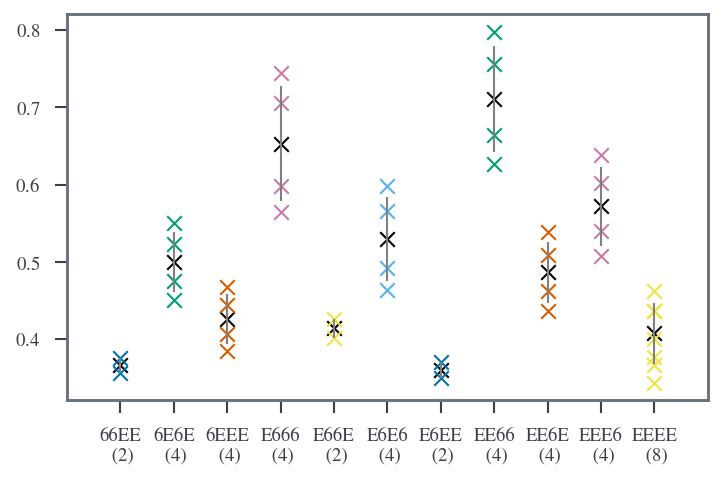

In [51]:
i = 1
xticks = []
xticklabels = []
mem_keys = sorted(mem_dict.keys())
for mem in mem_keys:
    # print([i for _ in mem_dict[mem][1]], mem_dict[mem][1])
    if len(mem_dict[mem][1]) != 0:
        plt.scatter(i, np.mean(mem_dict[mem][1]), color="black")
        plt.errorbar(
            i,
            np.mean(mem_dict[mem][1]),
            capsize=3,
            ecolor="grey",
            fmt="+",
            color="black",
            yerr=np.std(mem_dict[mem][1]),
        )
        plt.scatter([i for _ in mem_dict[mem][1]], mem_dict[mem][1], label=mem)
        xticks.append(i)
        xticklabels.append(mem + "\n (" + str(len(mem_dict[mem][1])) + ")")
        i += 1

plt.xticks(xticks, xticklabels)
plt.xlim(0, i)
# plt.legend()

In [40]:
mem_dict.keys()

dict_keys(['EEEE', 'EEE6', '6E6E', '6EE6', 'E66E', '6EEE', 'EE6E', '6E66', 'E6EE', '666E', 'E6E6', '66EE', '66E6', '6666', 'EE66', 'E666'])

In [48]:
mem_keys = sorted(mem_dict.keys())
mem_keys.reverse()

In [88]:
from src.models.model_setup import mems_to_df
df = mems_to_df(mem_keys)

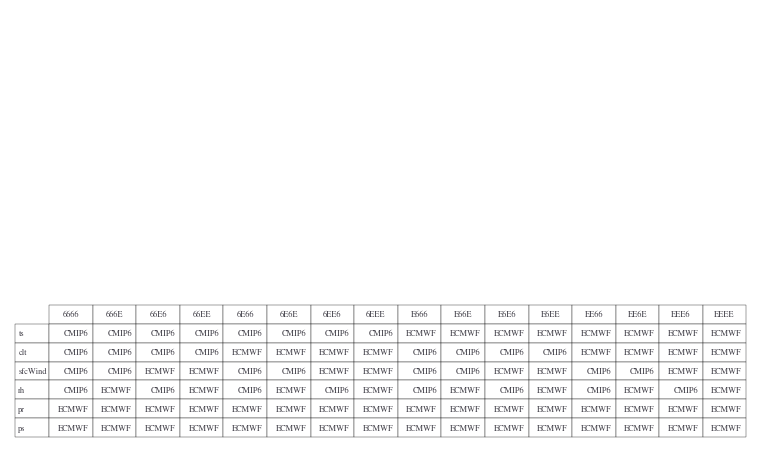

In [100]:
fig, ax = plt.subplots()
pd.plotting.table(ax,df.transpose())
plt.xticks([])
plt.yticks([])
# Hide grid lines
ax.grid(False)
plt.axis('off')
plt.tight_layout()


In [52]:
mem_keys

['6666',
 '666E',
 '66E6',
 '66EE',
 '6E66',
 '6E6E',
 '6EE6',
 '6EEE',
 'E666',
 'E66E',
 'E6E6',
 'E6EE',
 'EE66',
 'EE6E',
 'EEE6',
 'EEEE']

In [60]:
from src.constants import MODEL_NAMES, VAR_DICT
def mem_to_summary(mem:str) -> dict: 
    result_d = {}
    for i, value in enumerate(mem):
        print(i, VAR_DICT[i], MODEL_NAMES[value])
        result_d[VAR_DICT[i]] = MODEL_NAMES[value]
    return result_d
mem_to_summary("EEEE")
mem_to_summary("EEE6")
mem_to_summary("6EEC")

0 ts ECMWF
1 clt ECMWF
2 sfcWind ECMWF
3 rh ECMWF
0 ts ECMWF
1 clt ECMWF
2 sfcWind ECMWF
3 rh CMIP6
0 ts CMIP6
1 clt ECMWF
2 sfcWind ECMWF
3 rh CMIP5


{'ts': 'CMIP6', 'clt': 'ECMWF', 'sfcWind': 'ECMWF', 'rh': 'CMIP5'}

## Summary tables of runs

In [3]:
from src.wandb_utils import summary_table

In [4]:
summary_table("sdat2/ENSOTrend-gamma")

,index,ts,clt,sfcWind,rh,pr,ps,tau,c_d,eps_days,eps_frac,vary_cloud_const,trend_nino3.4 [degC],mean_nino3.4 [degC],mean_pac [degC]
0,SESS,CMIP6,ECMWF,CMIP6,CMIP6,ECMWF,ECMWF,ECMWF,0.00225,0.75,2.0,False,0.505120,27.087601,26.218040
1,EECCE,ECMWF,ECMWF,CMIP5,CMIP5,ECMWF,ECMWF,ECMWF,0.00225,0.75,2.0,False,0.817237,27.257566,26.300879
2,ESSE,ECMWF,CMIP6,CMIP6,ECMWF,ECMWF,ECMWF,ECMWF,0.00225,0.75,2.0,False,0.335936,27.076225,26.212515
3,SESS,CMIP6,ECMWF,CMIP6,CMIP6,ECMWF,ECMWF,ECMWF,0.00225,0.75,2.0,True,0.611463,27.136320,26.233788
4,EECCE,ECMWF,ECMWF,CMIP5,CMIP5,ECMWF,ECMWF,ECMWF,0.00225,0.75,2.0,True,1.064891,27.276243,26.313169
5,ESSE,ECMWF,CMIP6,CMIP6,ECMWF,ECMWF,ECMWF,ECMWF,0.00225,0.75,2.0,True,0.000000,0.000000,1.024149
6,SESS,CMIP6,ECMWF,CMIP6,CMIP6,ECMWF,ECMWF,ECMWF,0.00225,0.75,1.0,False,0.485317,27.078705,26.216551
7,EECCE,ECMWF,ECMWF,CMIP5,CMIP5,ECMWF,ECMWF,ECMWF,0.00225,0.75,1.0,False,0.785651,27.256149,26.300472
8,ESSE,ECMWF,CMIP6,CMIP6,ECMWF,ECMWF,ECMWF,ECMWF,0.00225,0.75,1.0,False,0.318892,27.068947,26.211222
9,SESS,CMIP6,ECMWF,CMIP6,CMIP6,ECMWF,ECMWF,ECMWF,0.00225,0.75,1.0,True,0.588602,27.125921,26.231976


In [5]:
summary_table("sdat2/ENSOTrend-beta")

,index,ts,clt,sfcWind,rh,pr,ps,tau,c_d,eps_days,eps_frac,vary_cloud_const,trend_nino3.4 [degC],mean_nino3.4 [degC],mean_pac [degC]
0,EEGG,ECMWF,ECMWF,MOHC.HadGEM3-GC31-LL.r1i1p1f3,MOHC.HadGEM3-GC31-LL.r1i1p1f3,ECMWF,ECMWF,ECMWF,0.00225,0.75,0.5,True,0.000000,0.000000,5.633691
1,SESS,CMIP6,ECMWF,CMIP6,CMIP6,ECMWF,ECMWF,ECMWF,0.00225,0.75,0.5,True,0.575857,27.120268,26.231049
2,SEES,CMIP6,ECMWF,ECMWF,CMIP6,ECMWF,ECMWF,ECMWF,0.00225,0.75,0.5,True,0.573042,27.119400,26.248104
3,SESE,CMIP6,ECMWF,CMIP6,ECMWF,ECMWF,ECMWF,ECMWF,0.00225,0.75,0.5,True,0.426699,27.060863,26.211390
4,ESSE,ECMWF,CMIP6,CMIP6,ECMWF,ECMWF,ECMWF,ECMWF,0.00225,0.75,0.5,True,0.000000,0.000000,1.024149
5,ESSS,ECMWF,CMIP6,CMIP6,CMIP6,ECMWF,ECMWF,ECMWF,0.00225,0.75,0.5,True,0.506604,27.138105,26.234684
6,ESES,ECMWF,CMIP6,ECMWF,CMIP6,ECMWF,ECMWF,ECMWF,0.00225,0.75,0.5,True,0.509718,27.141045,26.252346
7,EECE,ECMWF,ECMWF,CMIP5,ECMWF,ECMWF,ECMWF,ECMWF,0.00225,0.75,2.0,False,0.408031,27.107105,26.239676
8,EEEC,ECMWF,ECMWF,ECMWF,CMIP5,ECMWF,ECMWF,ECMWF,0.00225,0.75,2.0,True,0.807164,27.264380,26.302011
9,EECC,ECMWF,ECMWF,CMIP5,CMIP5,ECMWF,ECMWF,ECMWF,0.00225,0.75,2.0,False,0.771743,27.224466,26.298929


In [4]:
summary_table("sdat2/seager19")

Missing key mem
    full_key: atm.mem
    object_type=dict
Missing key mem
    full_key: atm.mem
    object_type=dict
Missing key mem
    full_key: atm.mem
    object_type=dict
Missing key mem
    full_key: atm.mem
    object_type=dict
Missing key vary_cloud_const
    full_key: atm.vary_cloud_const
    object_type=dict
Missing key vary_cloud_const
    full_key: atm.vary_cloud_const
    object_type=dict
Missing key vary_cloud_const
    full_key: atm.vary_cloud_const
    object_type=dict
Missing key vary_cloud_const
    full_key: atm.vary_cloud_const
    object_type=dict
Missing key vary_cloud_const
    full_key: atm.vary_cloud_const
    object_type=dict
Missing key vary_cloud_const
    full_key: atm.vary_cloud_const
    object_type=dict
Missing key vary_cloud_const
    full_key: atm.vary_cloud_const
    object_type=dict
Missing key vary_cloud_const
    full_key: atm.vary_cloud_const
    object_type=dict
Missing key vary_cloud_const
    full_key: atm.vary_cloud_const
    object_type=dict

,index,ts,clt,sfcWind,rh,pr,ps,tau,c_d,eps_days,eps_frac,vary_cloud_const,trend_nino3.4 [degC],mean_nino3.4 [degC],mean_pac [degC]
0,6EEE,CMIP6,ECMWF,ECMWF,ECMWF,ECMWF,ECMWF,ECMWF,0.00225,0.75,2.0,False,0.406436,27.104700,2.622433e+01
1,66EE,CMIP6,CMIP6,ECMWF,ECMWF,ECMWF,ECMWF,ECMWF,0.00225,0.75,2.0,False,0.376009,27.089785,2.622624e+01
2,6E6E,CMIP6,ECMWF,CMIP6,ECMWF,ECMWF,ECMWF,ECMWF,0.00225,0.75,2.0,False,0.474587,27.132683,2.629025e+01
3,66EE,CMIP6,CMIP6,ECMWF,ECMWF,ECMWF,ECMWF,ECMWF,0.00225,0.75,2.0,True,-26905.620581,-5602.992188,-1.569812e+14
4,6EEE,CMIP6,ECMWF,ECMWF,ECMWF,ECMWF,ECMWF,ECMWF,0.00225,0.75,2.0,True,0.467564,27.132328,2.623201e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,EEEE,ECMWF,ECMWF,ECMWF,ECMWF,ECMWF,ECMWF,ECMWF,0.00225,0.75,2.0,True,0.366095,27.084520,2.619155e+01
155,EEEE,ECMWF,ECMWF,ECMWF,ECMWF,ECMWF,ECMWF,ECMWF,0.00225,0.75,0.5,True,0.343836,27.074650,2.618952e+01
156,EEEf,ECMWF,ECMWF,ECMWF,fixed,ECMWF,ECMWF,ECMWF,0.00225,0.75,0.5,False,0.397791,27.106426,2.625883e+01
157,EEEE,ECMWF,ECMWF,ECMWF,ECMWF,ECMWF,ECMWF,ECMWF,0.00225,0.75,2.0,False,0.400535,27.101734,2.622359e+01


In [9]:
from src.wandb_utils import aggregate_table

In [11]:
cmip5_table = aggregate_table(project="sdat2/ENSOTrend-gamma", mem_list=["EEEE", "EECE", "EEEC", "EECC"])
cmip5_table

'summary_table'  1.62282 s 

'_aggregate_matches'  0.00867 s 



,ts,clt,sfcWind,rh,pr,ps,tau,trend_nino3.4 [degC],mean_nino3.4 [degC],mean_pac [degC],N
EEEE,ECMWF,ECMWF,ECMWF,ECMWF,ECMWF,ECMWF,ECMWF,0.41+/-0.04,27.131+/-0.007,26.2345+/-0.0022,6
EECE,ECMWF,ECMWF,CMIP5,ECMWF,ECMWF,ECMWF,ECMWF,0.46+/-0.04,27.151+/-0.009,26.247+/-0.004,6
EEEC,ECMWF,ECMWF,ECMWF,CMIP5,ECMWF,ECMWF,ECMWF,0.73+/-0.10,27.238+/-0.011,26.292+/-0.004,6
EECC,ECMWF,ECMWF,CMIP5,CMIP5,ECMWF,ECMWF,ECMWF,0.91+/-0.13,27.265+/-0.010,26.307+/-0.007,6


In [12]:
cmip6_table = aggregate_table(
    project="sdat2/ENSOTrend-gamma",
    mem_list=["EEEE", "EESE", "EEES", "EESS", "SSSSSSE"],
)
cmip6_table

'summary_table'  1.73339 s 

'_aggregate_matches'  0.01099 s 



,ts,clt,sfcWind,rh,pr,ps,tau,trend_nino3.4 [degC],mean_nino3.4 [degC],mean_pac [degC],N
EEEE,ECMWF,ECMWF,ECMWF,ECMWF,ECMWF,ECMWF,ECMWF,0.41+/-0.04,27.131+/-0.007,26.2345+/-0.0022,6
EESE,ECMWF,ECMWF,CMIP6,ECMWF,ECMWF,ECMWF,ECMWF,0.40+/-0.04,27.127+/-0.007,26.2173+/-0.0029,6
EEES,ECMWF,ECMWF,ECMWF,CMIP6,ECMWF,ECMWF,ECMWF,0.54+/-0.06,27.174+/-0.010,26.250+/-0.004,6
EESS,ECMWF,ECMWF,CMIP6,CMIP6,ECMWF,ECMWF,ECMWF,0.54+/-0.06,27.169+/-0.009,26.232+/-0.004,6
SSSSSSE,CMIP6,CMIP6,CMIP6,CMIP6,CMIP6,CMIP6,ECMWF,0.58+/-0.06,27.108+/-0.014,26.225+/-0.006,6


## Arrow plot

'summary_table'  1.88228 s 

'_aggregate_matches'  0.00849 s 

'summary_table'  1.96762 s 

'_aggregate_matches'  0.00844 s 

0.411
0 EECE 0.06+/-0.06 green
0 EEEC 0.32+/-0.11 orange
0 EECC 0.50+/-0.14 red
[1, 2, 3] ['W\n 0.06±0.06 K', 'RH\n 0.3±0.1 K', 'RH+W\n 0.5±0.1 K']
Difference 0.478
0.411
1 EESE -0.00+/-0.05 green
1 EEES 0.13+/-0.07 orange
1 EESS 0.14+/-0.07 red
[1, 2, 3] ['W\n -0.00±0.05 K', 'RH\n 0.1±0.1 K', 'RH+W\n 0.1±0.1 K']
Difference 0.361


<Figure size 3307.09x2043.89 with 0 Axes>

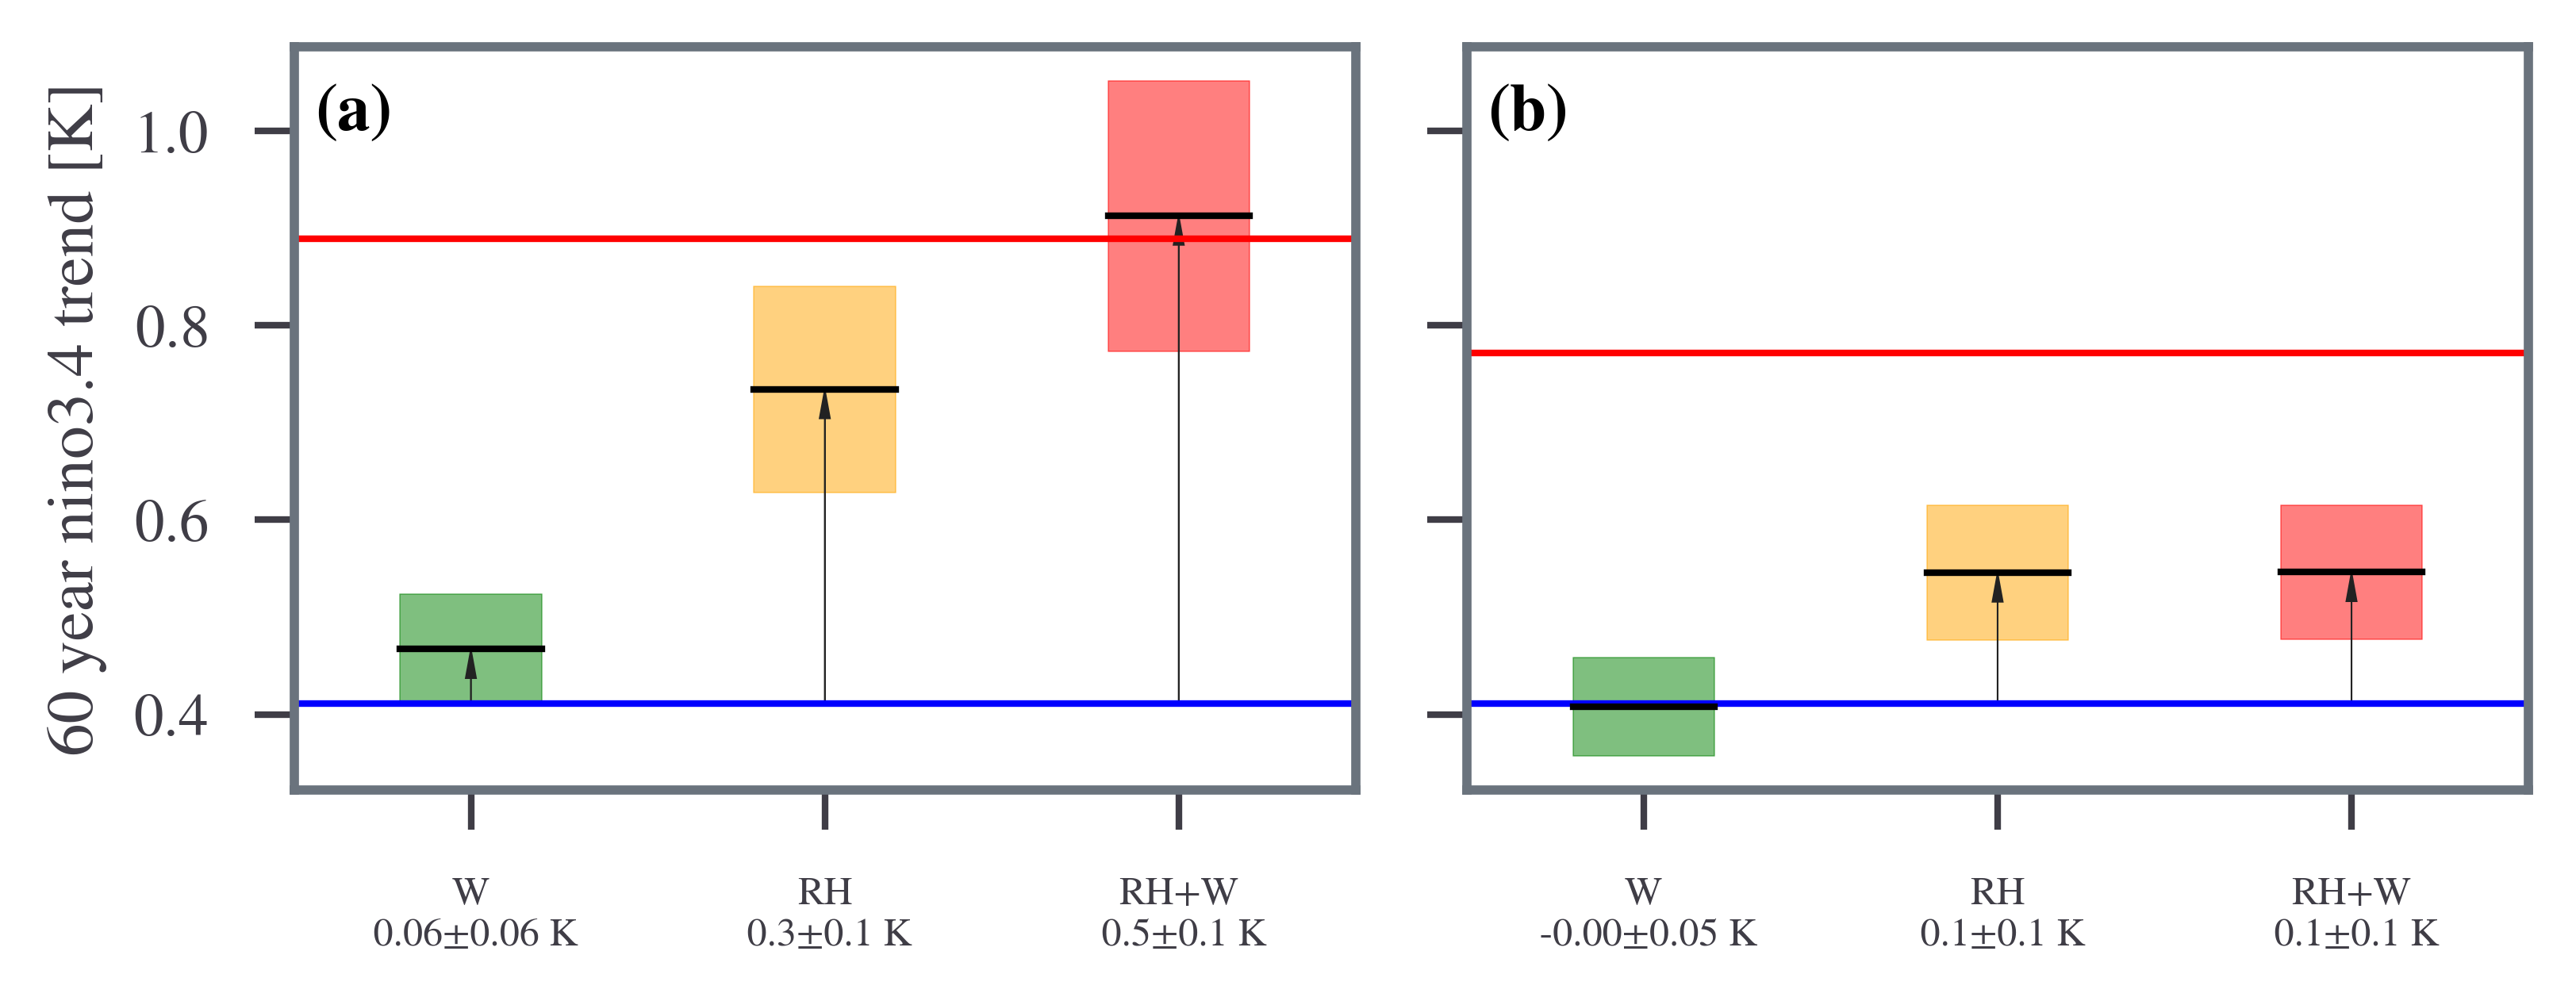

'summary_table'  1.20721 s 

'_aggregate_matches'  0.00866 s 

'summary_table'  2.16314 s 

'_aggregate_matches'  0.00832 s 

0.411
0 EECE 0.05+/-0.07 green
0 EEEC 0.29+/-0.12 orange
0 EECC 0.45+/-0.14 red
[1, 2, 3] ['W\n 0.05±0.07 K', 'RH\n 0.3±0.1 K', 'RH+W\n 0.5±0.1 K']
Difference 0.478
0.411
1 EESE -0.01+/-0.06 green
1 EEES 0.13+/-0.08 orange
1 EESS 0.18+/-0.05 red
[1, 2, 3] ['W\n -0.01±0.06 K', 'RH\n 0.1±0.1 K', 'RH+W\n 0.2±0.0 K']
Difference 0.361


<Figure size 3307.09x2043.89 with 0 Axes>

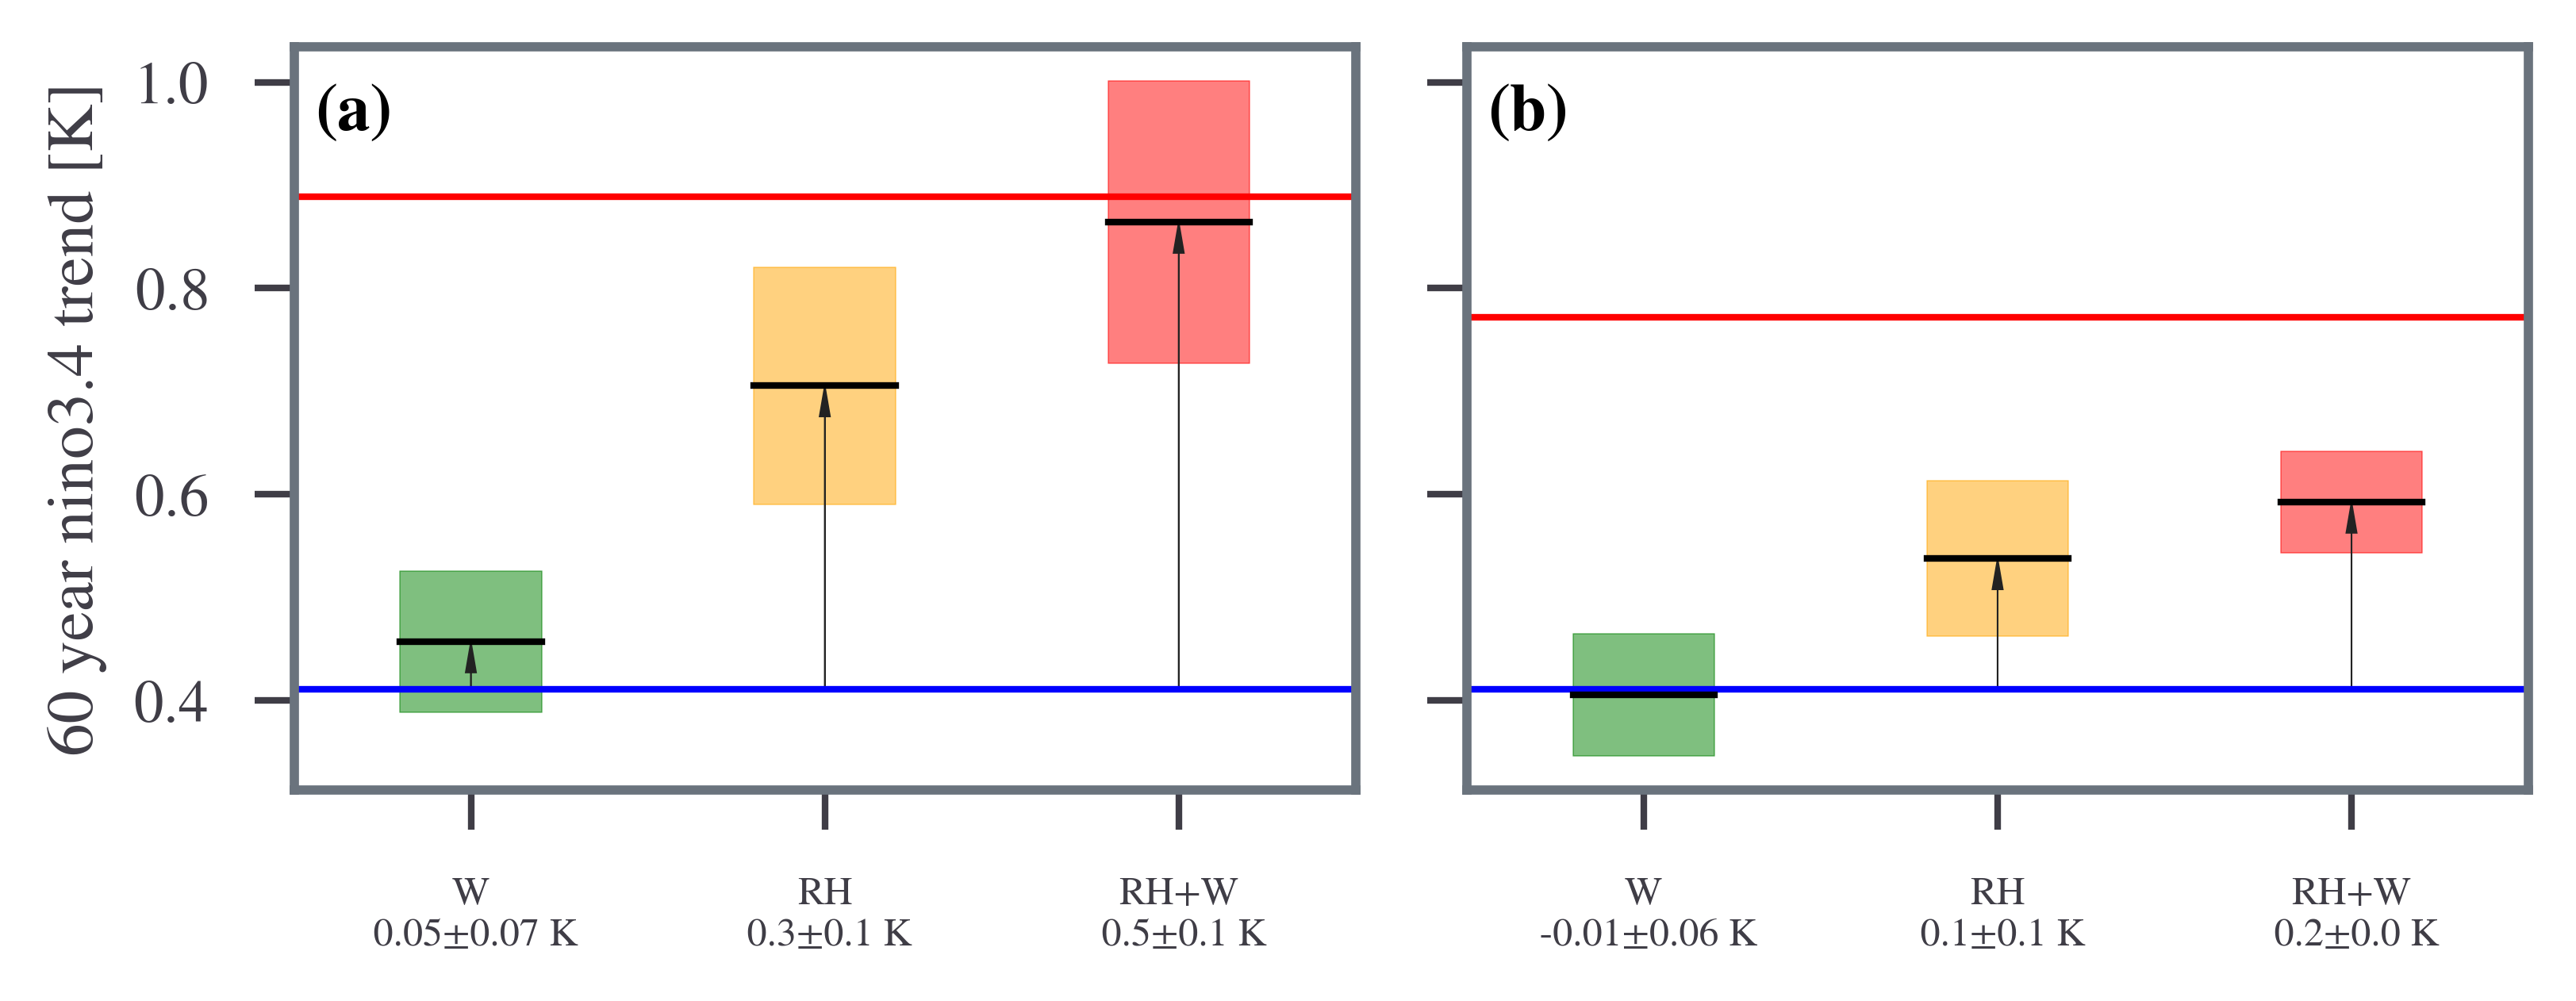

'summary_table'  3.74761 s 

'_aggregate_matches'  0.00919 s 

'summary_table'  5.41381 s 

'_aggregate_matches'  0.00867 s 

0.411
0 EECE 0.06+/-0.08 green
0 EEEC 0.34+/-0.09 orange
0 EECC 0.45+/-0.14 red
[1, 2, 3] ['W\n 0.06±0.08 K', 'RH\n 0.3±0.1 K', 'RH+W\n 0.5±0.1 K']
Difference 0.478
0.411
1 EESE 0.06+/-0.07 green
1 EEES 0.14+/-0.08 orange
1 EESS 0.28+/-0.10 red
[1, 2, 3] ['W\n 0.06±0.07 K', 'RH\n 0.1±0.1 K', 'RH+W\n 0.3±0.1 K']
Difference 0.361


<Figure size 3307.09x2043.89 with 0 Axes>

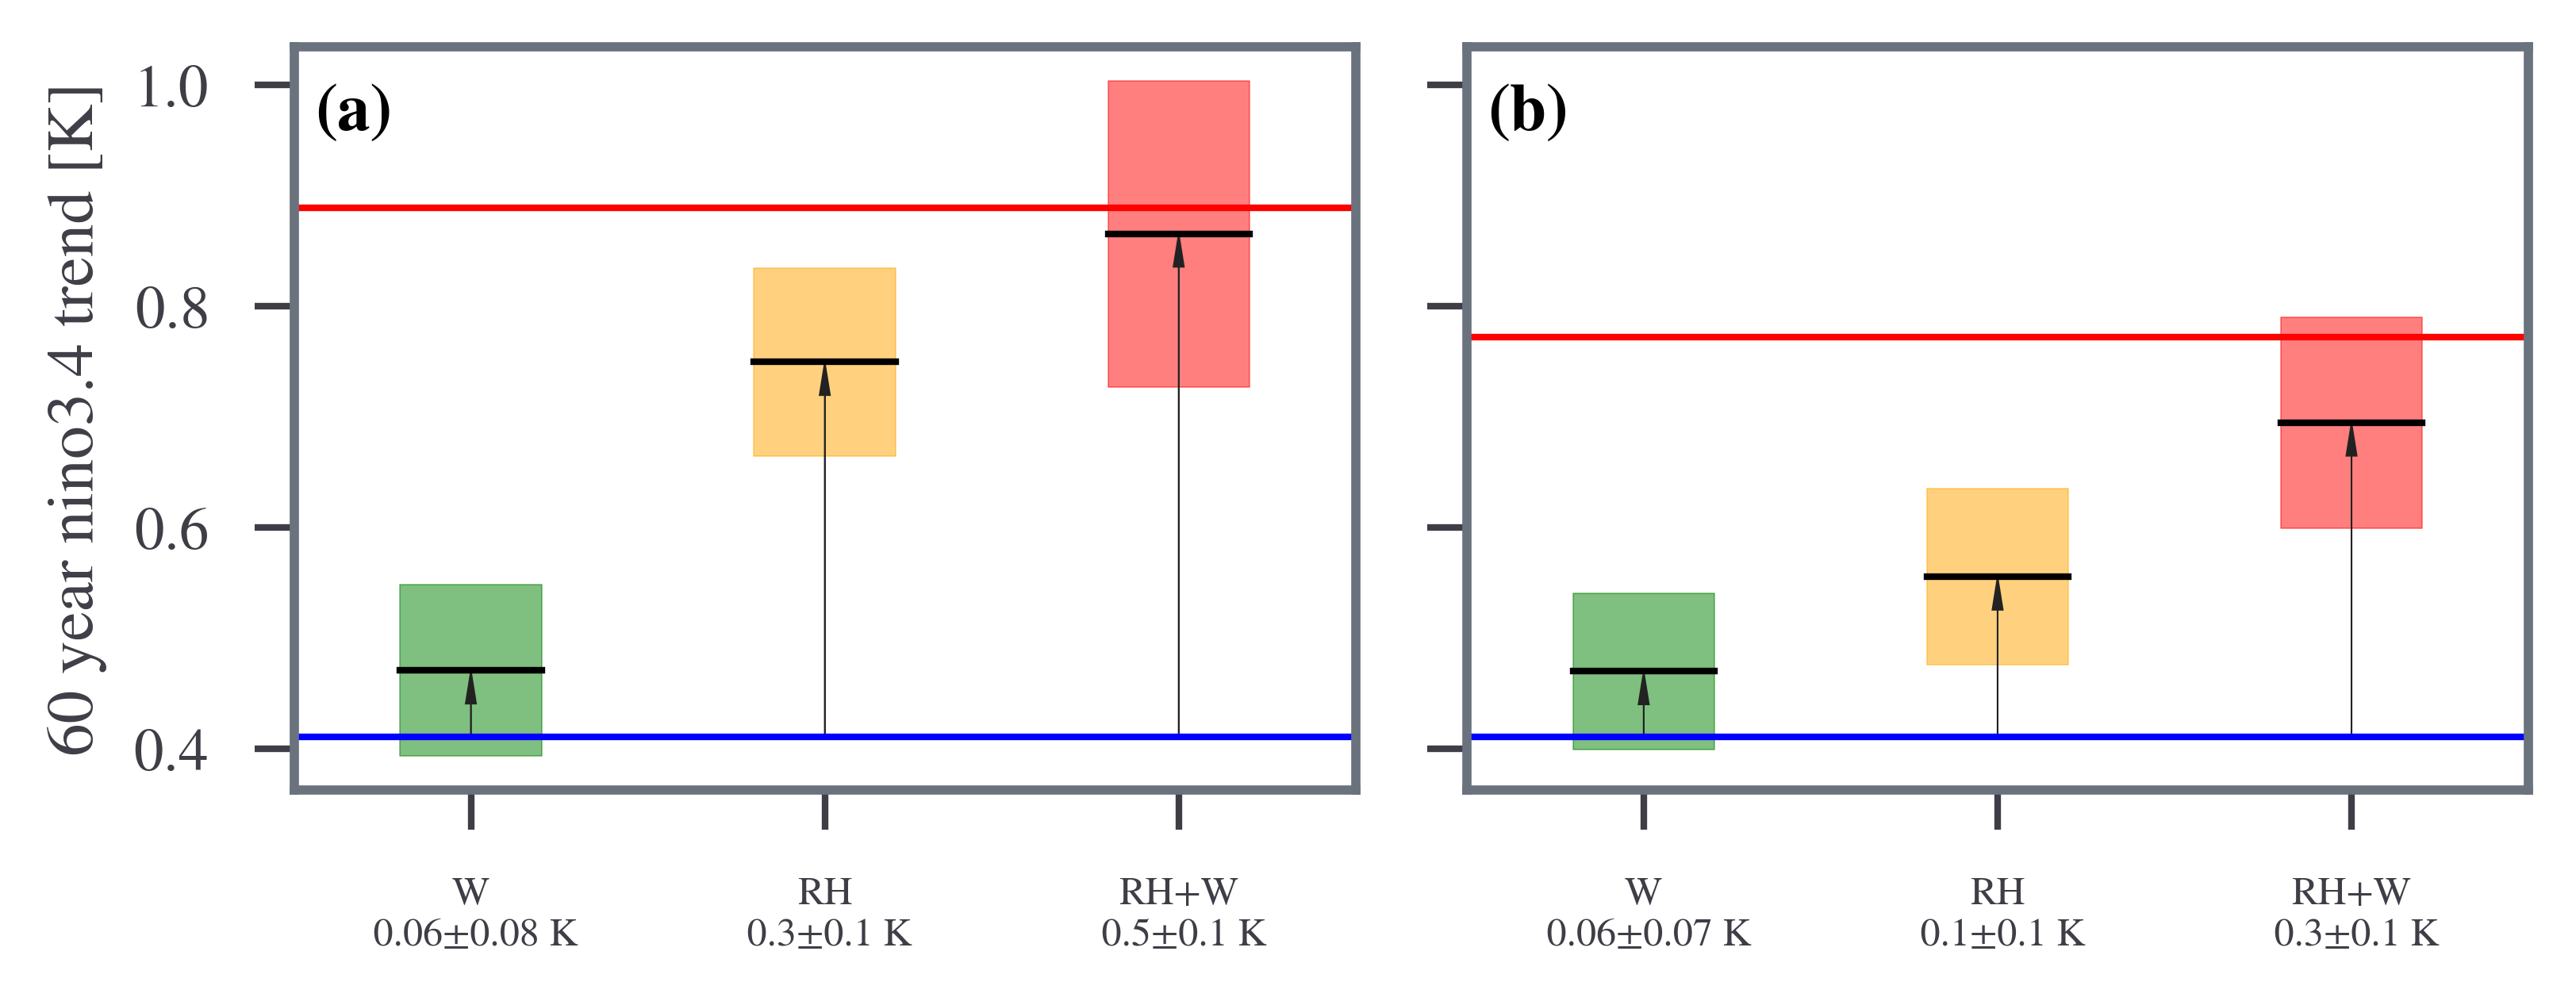

In [38]:
from src.visualisation.arrow import arrow_plot

arrow_plot(project="sdat2/ENSOTrend-gamma", show_plots=True, save_path=True)
arrow_plot(project="sdat2/ENSOTrend-beta", show_plots=True, save_path=True)
arrow_plot(project="sdat2/seager19", show_plots=True, save_path=True)

## Multi bias plot

CMIP6
      CMIP5 MMM  LENS MMM  NCEP NCAR   ERSSTv5   HadlSST
2008   0.594690  0.460177        NaN  0.527434  0.265487
2009   0.614159  0.499115   0.238938  0.495575  0.267257
2010   0.647788  0.536283   0.109735  0.355752  0.134513
2011   0.681416  0.541593   0.015929  0.306195  0.077876
2012   0.702655  0.557522   0.017699  0.299115  0.072566
2013   0.752212  0.623009   0.021239  0.334513  0.097345
2014   0.785841  0.679646   0.010619  0.295575  0.079646
2015   0.810619  0.670796   0.086726  0.330973  0.118584
2016   0.838938  0.667257   0.077876  0.293805  0.076106
2017   0.872566  0.704425   0.129204  0.353982  0.106195
'plot_nino_box'  0.00041 s 

'plot_nino_box'  0.00037 s 

'plot_nino_box'  0.00036 s 



<Figure size 3307.09x2043.89 with 0 Axes>

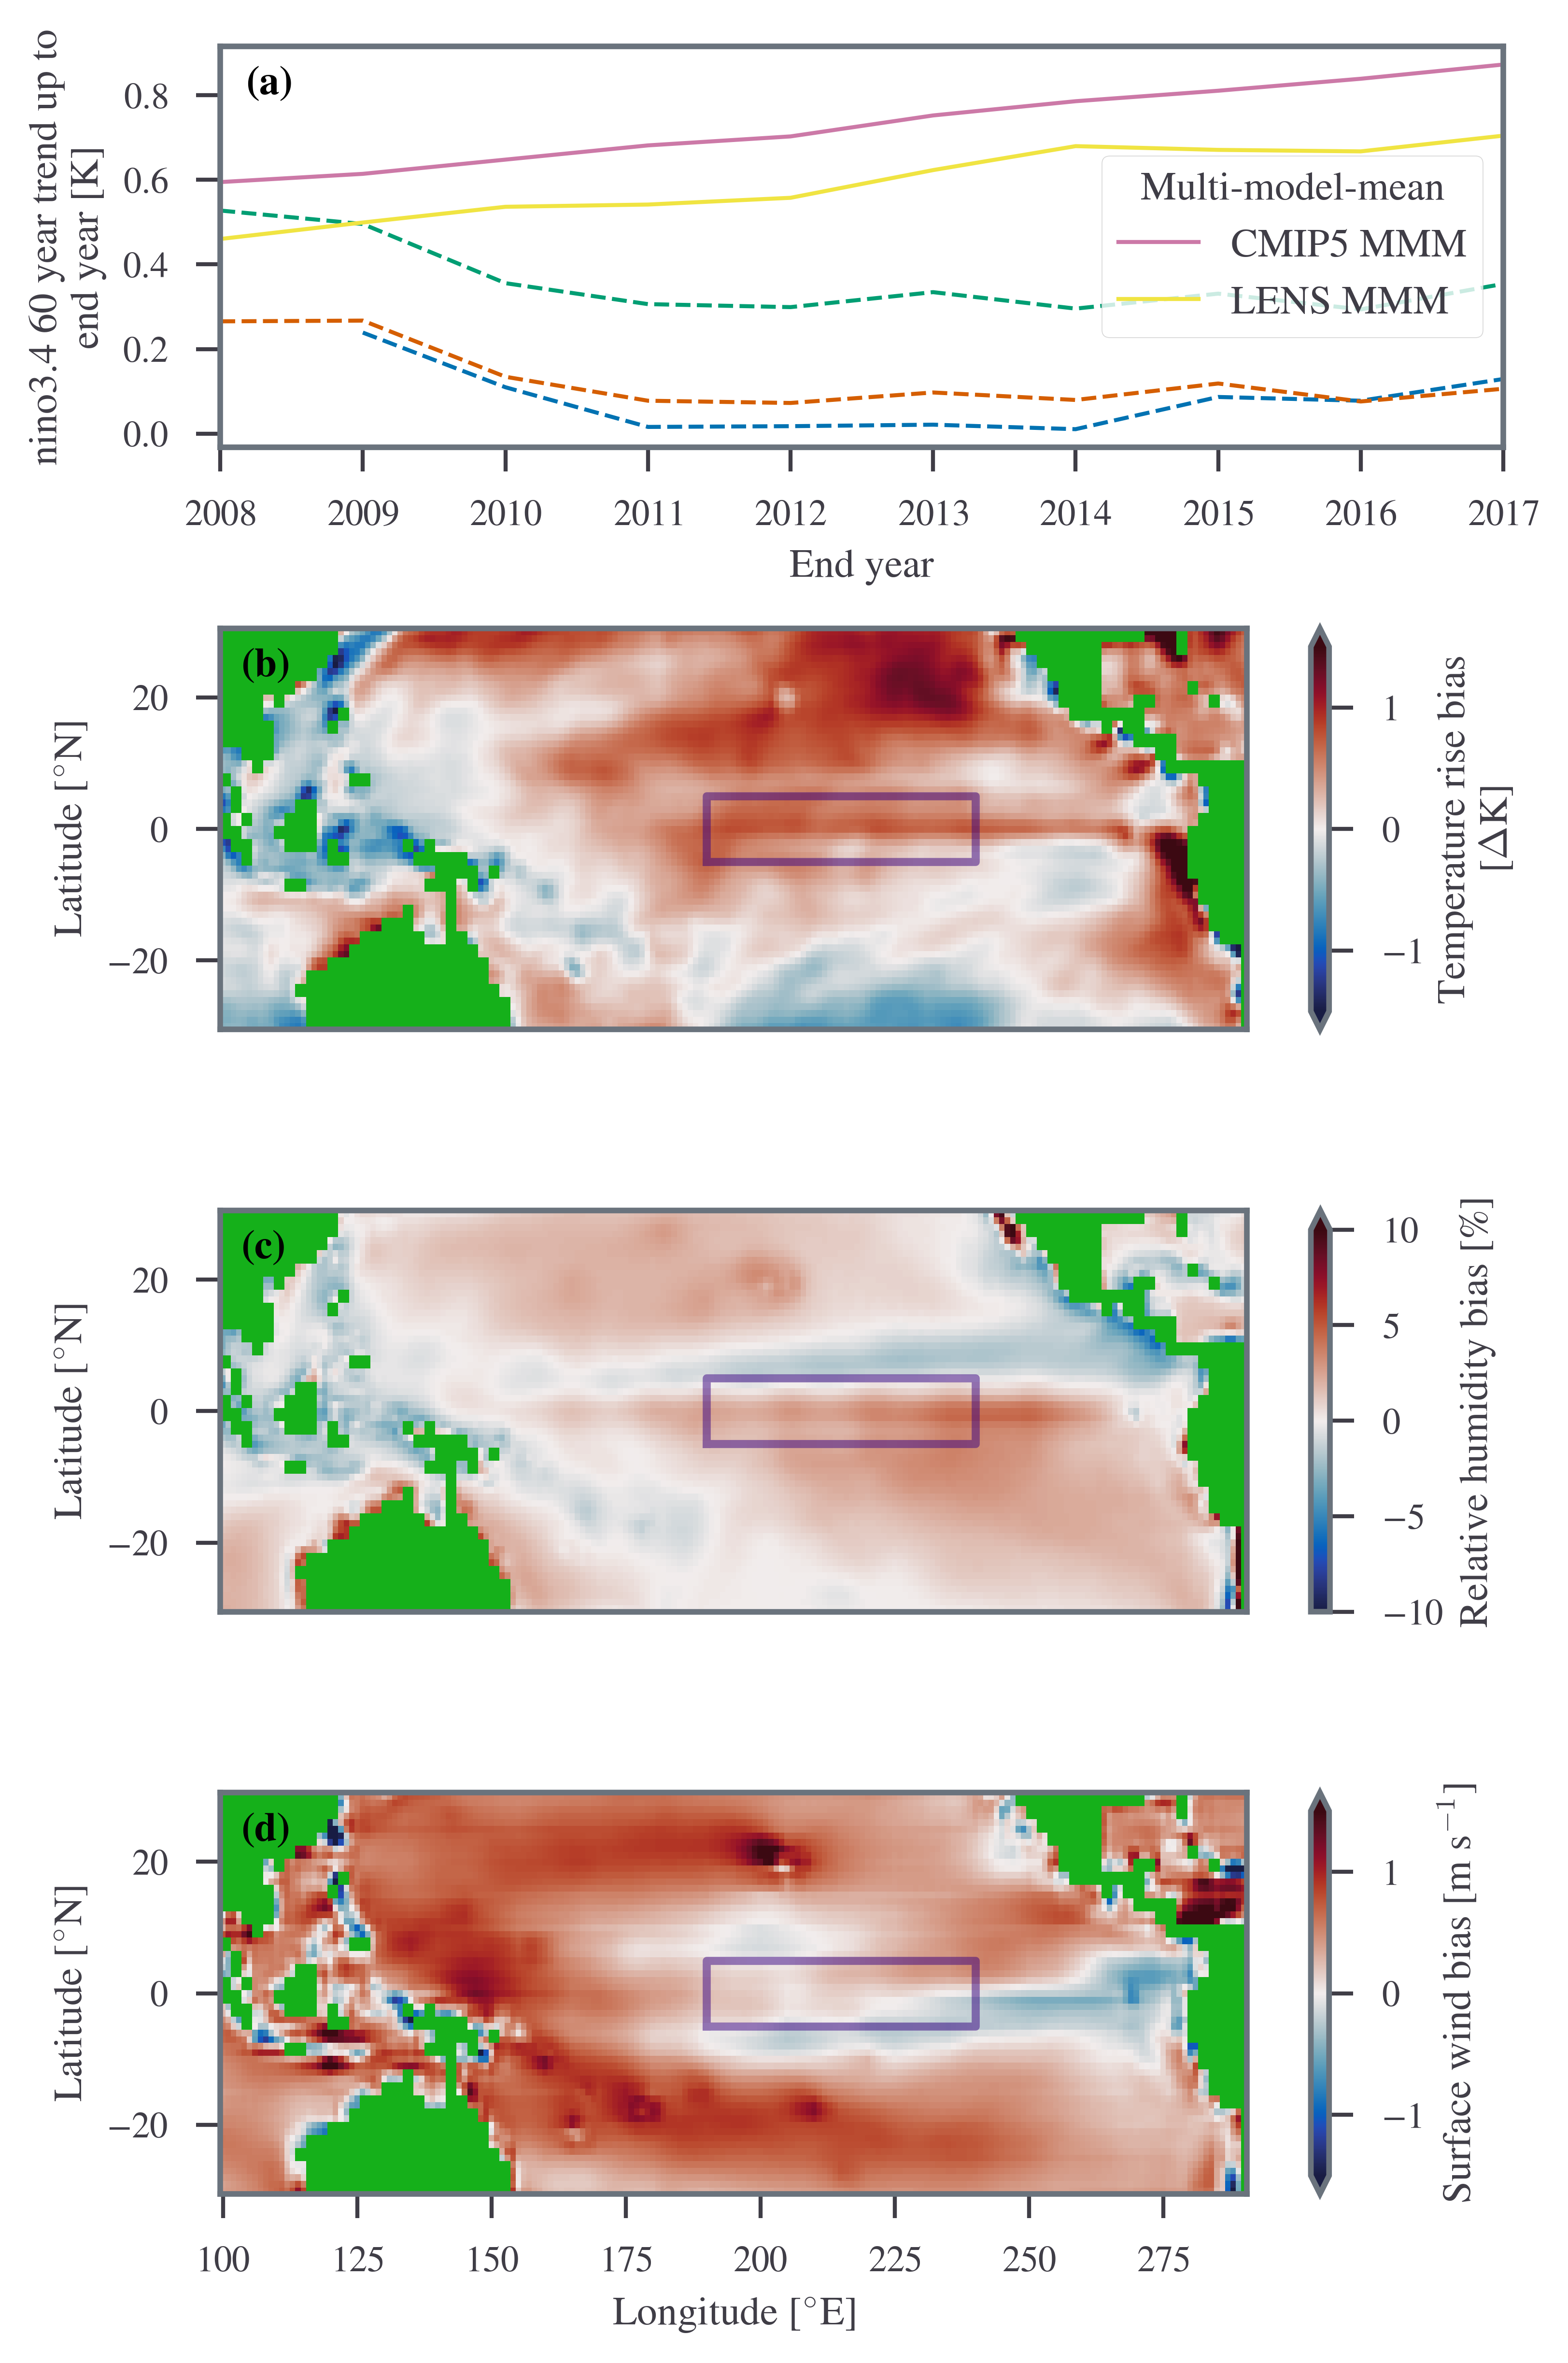

CMIP5
      CMIP5 MMM  LENS MMM  NCEP NCAR   ERSSTv5   HadlSST
2008   0.594690  0.460177        NaN  0.527434  0.265487
2009   0.614159  0.499115   0.238938  0.495575  0.267257
2010   0.647788  0.536283   0.109735  0.355752  0.134513
2011   0.681416  0.541593   0.015929  0.306195  0.077876
2012   0.702655  0.557522   0.017699  0.299115  0.072566
2013   0.752212  0.623009   0.021239  0.334513  0.097345
2014   0.785841  0.679646   0.010619  0.295575  0.079646
2015   0.810619  0.670796   0.086726  0.330973  0.118584
2016   0.838938  0.667257   0.077876  0.293805  0.076106
2017   0.872566  0.704425   0.129204  0.353982  0.106195
[Errno 2] No such file or directory: b'/home/users/sithom/seager19/atmos/DATA/ts-CMIP5-trend.nc'
'plot_nino_box'  0.00036 s 

'plot_nino_box'  0.00035 s 



<Figure size 3307.09x2043.89 with 0 Axes>

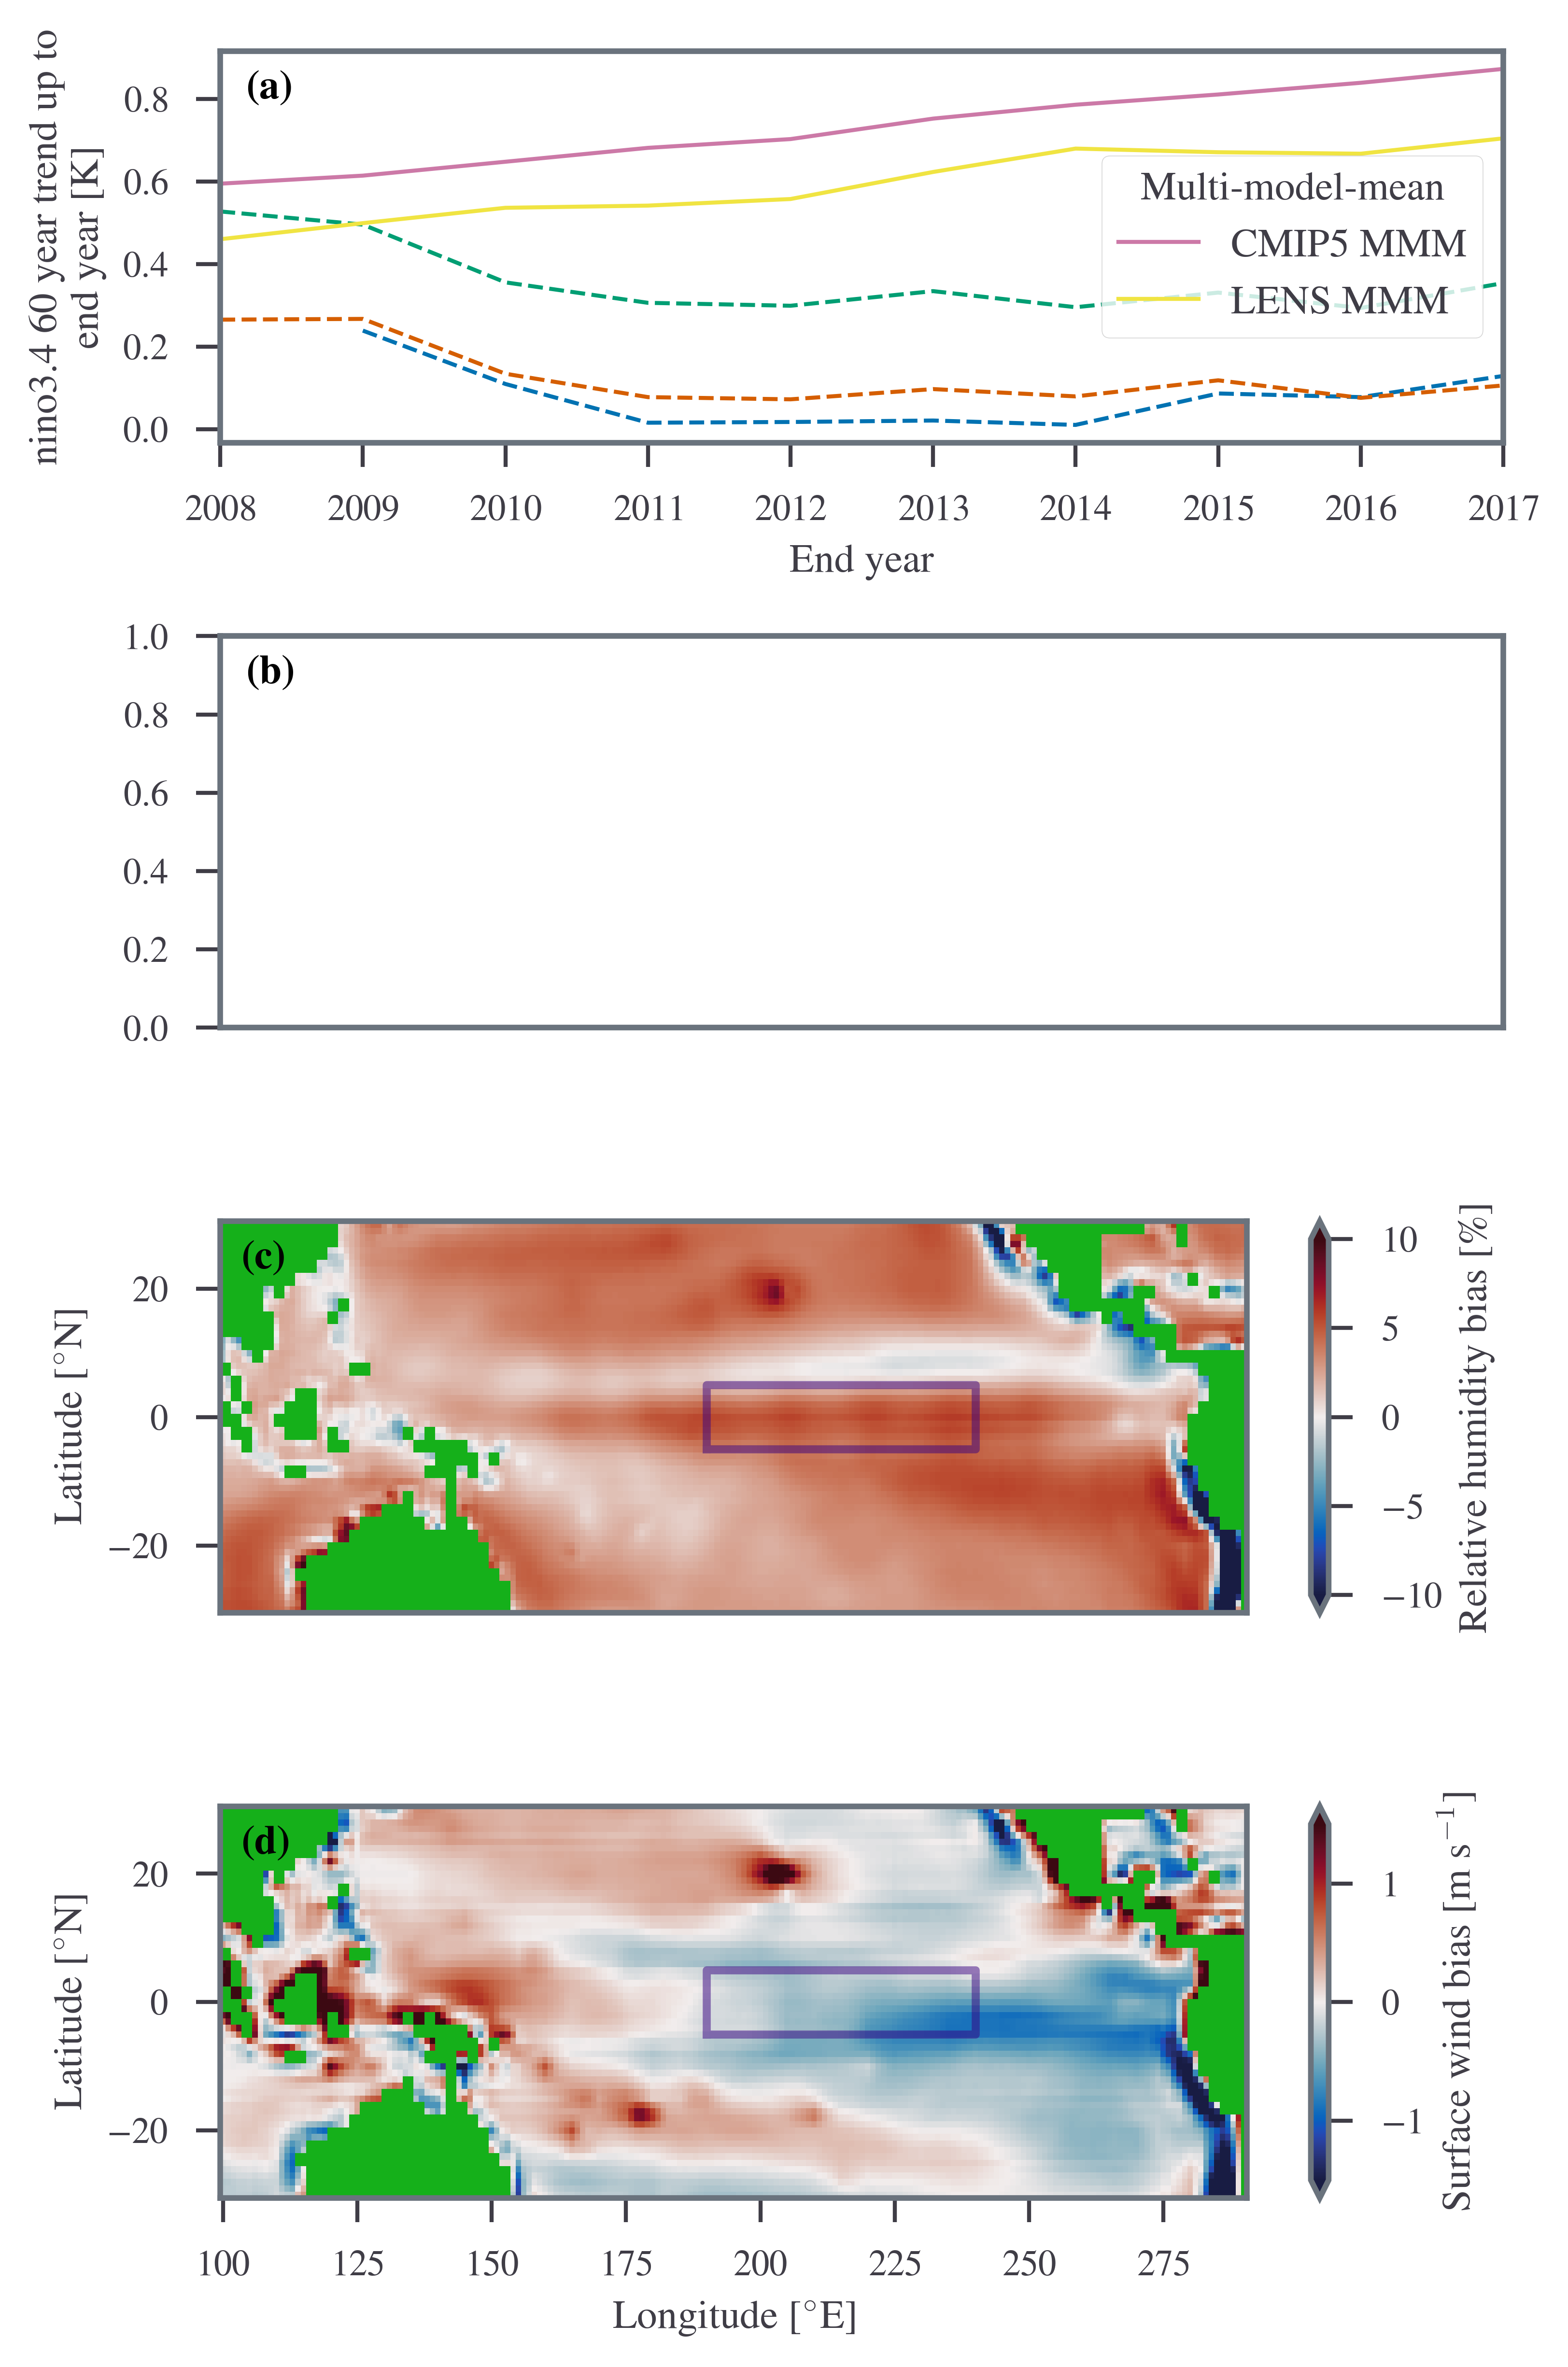

In [7]:
from src.visualisation.bias import multi_bias_plot 
print("CMIP6")
multi_bias_plot("S")
plt.show()
print("CMIP5")
multi_bias_plot("C")
plt.show()